---

# Lecture 8

---

- [**1. More on Matplotlib/Pylab - saving images to files**](#1.-More-on-Matplotlib/Pylab---saving-images-to-files)


- [**2. Numerical integration**](#2.-Numerical-integration)

    - [**2.1. Numerical integration using Scipy's function trapz**](#2.1.-Numerical-integration-using-Scipy's-function-trapz)
    - [**2.2. Numerical integration using Scipy's function quad**](#2.2.-Numerical-integration-using-Scipy's-function-quad)


- [**3. Higher order functions II**](#3.-Higher-order-functions-II)

    - [**3.1 Function closures**](#3.1-Function-closures)
    - [**3.2. Lambda function**](#3.2.-Lambda-function)
    

- [**4. More practice with NumPy**](#4.-More-practice-with-NumPy)

    - [**4.1. Numpy arrays (vectors)**](#4.1.-Numpy-arrays-(vectors))
    - [**4.2. Linear algebra tools in Numpy**](#4.2.-Linear-algebra-tools-in-Numpy) 
    

---

## 1. More on Matplotlib/Pylab - saving images to files

- Plots generated in Matplotlib / Pylab can be saved in different formats and quality using `savefig` command.

Example:

- Plot $\cos(x)$ and $\sin(x)$ over interval $(0, 2\pi)$ and save images to file using _jpg_ and _pdf_ file formats. 

In [1]:
import matplotlib.pyplot as plt
import numpy

In [2]:
x = numpy.arange(0.0, 2*numpy.pi, 0.1)

In [3]:
y = numpy.cos(x)

In [4]:
z = numpy.sin(x)

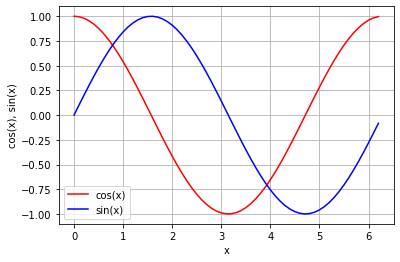

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', label='cos(x)')
ax.plot(x, z, 'b-', label='sin(x)')
ax.set_xlabel('x')
ax.set_ylabel('cos(x), sin(x)')
ax.legend()
ax.grid(True)

fig.savefig('fig.jpg') # save as jpg file
fig.savefig('fig.pdf') # save as pdf file


- Which creates the files `fig.jpg` (bitmap graphics) and `fig.pdf` (vector graphics) in the local directory.

### 1.1. Bitmap versus Vector graphics

- __Bitmap (or raster) images__ are stored as a series of tiny dots called pixels

  - Each pixel is actually a very small square that is assigned a color, and then arranged in a pattern to form the image
  - Best for images that need to have a wide range of color gradations, such as most photographs


- __Vector images__ are not based on pixel patterns, but instead use mathematical formulas to draw lines and curves that can be combined to create an image from geometric objects such as circles and polygons

  - suitable for images that consist of a few areas of solid color

---

## 2. Numerical integration

Aim: to find an approximation of $I = \int_a^b f(x)dx$

Simple trapezoidal method:
- approximate $f(x)$ by a simpler (linear) function $p(x)$ and
- integrate the approximation $p(x)$ exactly

Composite trapezoidal method:
- divides the interval $[a,b]$ into $n$ equal subintervals
- employs the simple trapezoidal method for each subinterval
- has an error term of order $h^2$



Example:

- calculate integral:

$$
I = \int_0^2\exp(-x^2)dx
$$

- recall this is just the area under the curve $\exp(-x^2)$

- we can use the composite trapezoidal rule to estimate the integral

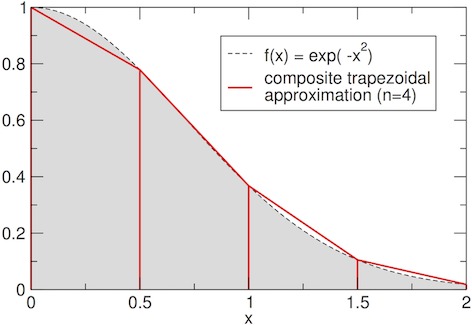

- We approximate the area under the function using a series of trapezoids:

$$
\begin{split}
\int_0^2f(x)dx
&=
\int_{x_0}^{x_1}f(x)dx
+\int_{x_1}^{x_2}f(x)dx
+\int_{x_2}^{x_3}f(x)dx
+\int_{x_3}^{x_4}f(x)dx\\
\\
&\approx
\frac{h}{2}[\,f(x_0)+f(x_1)]
+\frac{h}{2}[\,f(x_1)+f(x_2)]
+\frac{h}{2}[\,f(x_2)+f(x_3)]
+\frac{h}{2}[\,f(x_3)+f(x_4)]\\
\\
&=
\frac{h}{2}\big(\,f(x_0)+2f(x_1)+2f(x_2)+2f(x_3)+f(x_4)\big)\\
\\
&=
\frac{h}{2}\big(\,f(x_0)+2\sum_{i=1}^{4-1}f(x_i) +f(x_4)\big)
\end{split}
$$

$\hskip1cm$ where $(x_0, x_1, x_2, x_3, x_4) = (0, 0.5, 1.0, 1.5, 2)$ and $h = x_k-x_{k-1} = 0.5$ for all $k$

- For $n$ subintervals the formulate for the composite trapezoidal rule can be generalised to:

$$\int_a^bf(x)dx
\approx\frac{h}{2}\big(\,f(a)+2\sum_{i=1}^{n-1}f(x_i)+f(b)\big)$$

    where

$$
h = \frac{b-a}{n}
$$
     
    and
$$
x_i = a+ih\hskip1cm\textrm{with}\hskip1cm i = 1,\dots,n-1
$$

- This formula is easy to implement in Python using `for` (or `while`) loops to evaluate the underlying sums

### 2.1. Numerical integration using Scipy's function `trapz`

- Composite trapezoidal rule is imlemented as function `trapz` in `scipy.integrate` package


- `trapz` allows integrating functions given as fixed samples of function points

Example:

- Solve the integral $\int_0^2\exp(-x^2)dx$ using composite trapezoidal rule function `trapz` from `scipy.integrate`


- Compare with analytical solution:

$$
\int_0^z\exp(-x^2)dx = \frac{\sqrt{\pi}}{2}\mathrm{erf}(z)
$$

- Based on the analytical solution evaluate the precision of `trapz`

- Analytical solution of the integral:

In [6]:
import math

In [7]:
Ian = math.sqrt(math.pi)/2.0 * math.erf(2)

- Numerical solution using `trapz`:

In [8]:
a, b, h = 0, 2, 0.1

In [9]:
x = numpy.arange(a, b, h)

In [10]:
y = numpy.exp(-x**2)

In [11]:
import scipy.integrate

In [12]:
Itr = scipy.integrate.trapz(y, x)

In [13]:
print("\tIan = {}".format(Ian))
print("\tItr = {}\n".format(Itr))
print("\t|Ian - Itr| = {}".format(abs(Itr-Ian)))

	Ian = 0.8820813907624215
	Itr = 0.8797520661078067

	|Ian - Itr| = 0.002329324654614884


- Refine the step $h$ and compare the result:

In [14]:
a, b, h = 0, 2, 0.001

In [15]:
x = numpy.arange(a, b, h)

In [16]:
y = numpy.exp(-x**2)

In [17]:
Itr = scipy.integrate.trapz(y, x)

In [18]:
print("\tIan = {}".format(Ian))
print("\tItr = {}\n".format(Itr))
print("\t|Ian - Itr| = {}".format(abs(Itr-Ian)))

	Ian = 0.8820813907624215
	Itr = 0.8820630323228774

	|Ian - Itr| = 1.835843954411942e-05


- The numerical error produced by composite trapezoidal rule decreases with the step $h$ and it can be shown that the error term is proportional to $h^2$

### 2.2. Numerical integration using Scipy's function `quad`

- `quad` is imlemented in `scipy.integrate` package


- `quad` allows integrating functions given as function object

Example:

- Compare accuracies of functions `trapz` and `quad`

- For `trapz`:

In [19]:
a, b, h = 0, 2, 0.1
x = numpy.arange(a, b, h)
y = numpy.exp(-x**2)
Itr = scipy.integrate.trapz(y, x)

- For `quad`:

In [20]:
def expon(x):
    return numpy.exp(-x**2)

In [21]:
Iqu = scipy.integrate.quad(expon, a, b)

In [22]:
print("\tIan: {}".format(Ian))
print("\tItr: {}".format(Itr))
print("\tIsi: {}\n".format(Iqu[0]))
print("\t|Ian - Itr|: {}".format(abs(Itr-Ian)))
print("\t|Ian - Isi|: {}".format(abs(Iqu[0]-Ian)))

	Ian: 0.8820813907624215
	Itr: 0.8797520661078067
	Isi: 0.8820813907624215

	|Ian - Itr|: 0.002329324654614884
	|Ian - Isi|: 0.0


- The function `quad` internally choses from a range of sophisticated numerical integration methods and refines the integration step to reach the best possible precision given the expected tolerance (see `help(quad)` for more details on default input arguments)

---

## 3. Higher order functions II

Higher order functions - roughly means that functions can take or return functions

(see for example http://en.wikipedia.org/wiki/Higher-order_function)

### 3.1 Function closures

- We have seen that we can pass function objects as arguments to a function. Now we look at functions that return function objects.


- A closure is a function with bound variables. We often create closures by calling a function that returns a (specialised) function.

Example:

In [23]:
def make_add42():
    def add42(x):
        return x + 42
    return add42

In [24]:
add42 = make_add42()

In [25]:
type(add42)

function

In [26]:
add42(2)

44

Example:

In [27]:
import math

def make_adder(y):
    def adder(x):
        return x + y
    return adder

In [28]:
add42 = make_adder(42)
addpi = make_adder(math.pi)

In [29]:
add42(2)

44

In [30]:
addpi(-3)

0.14159265358979312

The criteria that must be met to create closure in Python can be summarized as follows:

- We must have a nested function (function inside a function)


- The nested function must refer to a value defined in the enclosing function


- The enclosing function must return the nested function

### 3.2. Lambda function

- `lambda` function: anonymous function (function literal)


- Useful to define a small helper function that is only needed once

In [31]:
lambda a: 2*a

<function __main__.<lambda>(a)>

In [32]:
(lambda a: 2*a)

<function __main__.<lambda>(a)>

In [33]:
(lambda a: 2*a)(10)

20

In [34]:
(lambda a: 2*a)(20)

40

In [35]:
(lambda x, y: x + y)(10, 20)

30

In [36]:
(lambda x, y, z: (x + y) * z )(10, 20, 2)

60

In [37]:
type(lambda x, y: x + y)

function

Example:

- Consider our root-finding example:

- Find root of a function $f(x)=x^2(x-2)$ existing for $x > 0$.

In [38]:
from scipy.optimize import bisect

In [39]:
def f(x):
    """
    Returns f(x)=x^3-2x^2. Has roots at
    x=0 (double root) and x=2.
    """
    return x**3 - 2*x**2

xroot = bisect(f, 1.5, 3)

In [40]:
xroot

1.9999999999995453

- Now use `lambda` function:

In [41]:
xroot = bisect(lambda x: x**3 - 2*x**2, 1.5, 3)

In [42]:
xroot

1.9999999999995453

- In summary `lambda` is used to define function "in-place"

---

## 4. More practice with NumPy

- Numpy is an interface to high performance linear algebra libraries (ATLAS, LAPACK, BLAS)


- Numpy provides

  - the `array` object
  - fast mathematical operations over arrays
  - linear algebra, Fourier transforms, Random Number generation
  
  
  
- Numpy is _not_ part of the Python standard library

### 4.1. Numpy arrays (vectors)

- An array is a sequence of objects


- All objects in one array are of the same type

In [43]:
import numpy

In [44]:
x = numpy.linspace(0, 5, 11)  # sets number of elements

In [45]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [46]:
type(x)

numpy.ndarray

In [47]:
x = numpy.arange(0, 5.5, 0.5) # sets spacing between the elements

In [48]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [49]:
y = numpy.cos(x)

In [50]:
y

array([ 1.        ,  0.87758256,  0.54030231,  0.0707372 , -0.41614684,
       -0.80114362, -0.9899925 , -0.93645669, -0.65364362, -0.2107958 ,
        0.28366219])

- Numpy contains all of the standard functions, such as $\cos$, $\sin$, $\exp$, etc


- They operate elementwise on arrays


- Plot $\cos(x)$ and $\sin(x)$ over interval $(0, 2\pi)$ and save images to file using _jpg_ and _pdf_ file formats. 

In [51]:
x = numpy.arange(0, 2*math.pi, 0.1)

In [52]:
y = numpy.cos(x)

In [53]:
z = numpy.sin(x)

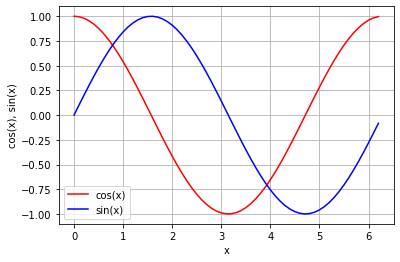

In [54]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', label='cos(x)')
ax.plot(x, z, 'b-', label='sin(x)')
ax.set_xlabel('x')
ax.set_ylabel('cos(x), sin(x)')
ax.legend()
ax.grid(True)


### 4.2. Linear algebra tools in Numpy

- linear algebra tools are given in `numpy.linalg`


- `help(numpy.linalg)` provides an overview of algebra tools in Numpy, e.g.:

  - `pinv` - compute the inverse of a matrix

  - `svd` - compute a singular value decomposition

  - `det` - compute the determinant

  - `eig` - compute eigenvalues and eigenvectors



#### 4.2.1. Example: Solving linear systems of equations

- Consider system of two linear equations:

$$x_1 + 2x_1 = -1$$

$$3x_1 + 5x_2 = -2$$

- Find solutions for the unknowns $x_1$ and $x_2$.

- First note that this can be rewritten in the matrix form $Ax = b$ as:

$$
{\begin{bmatrix}
    1 & 2 \\
    3 & 5 \\
\end{bmatrix}
\begin{bmatrix}
    x_1 \\
    x_2 \\
\end{bmatrix}}
\equiv
\begin{bmatrix}
    -1 \\
    -2 \\
\end{bmatrix}
$$

- And thus:

$$
A\equiv
\begin{bmatrix}
    1 & 2 \\
    3 & 5 \\
\end{bmatrix}
\hskip1cm
x\equiv
\begin{bmatrix}
    x_1 \\
    x_2 \\
\end{bmatrix}
\hskip1cm
b\equiv
\begin{bmatrix}
    -1 \\
    -2 \\
\end{bmatrix}
$$

<br><br>
- The system can then be solved by a direct matrix inversion as $x = A^{-1}b$, where $A^{-1}$ denotes the inverse matrix of the matrix $A$, i.e.:

$$
\begin{bmatrix}
    x_1 \\
    x_2 \\
\end{bmatrix}
\equiv
\begin{bmatrix}
    1 & 2 \\
    3 & 5 \\
\end{bmatrix}^{-1}
\begin{bmatrix}
    -1 \\
    -2 \\
\end{bmatrix}
$$

- This can be done using Numpy as follows:

In [55]:
A = numpy.array([[1, 2], [3, 5]])  # matrix A

b = numpy.array([-1, -2])  # right hand side array

In [56]:
Ainv = numpy.linalg.pinv(A)  # evaluate inverse matrix

In [57]:
Ainv

array([[-5.,  2.],
       [ 3., -1.]])

In [58]:
x = numpy.dot(Ainv, b)

In [59]:
x

array([ 1., -1.])

- Alternative way of solving systems of linear equations is by using function `solve` from `numpy.linalg`:

In [60]:
x = numpy.linalg.solve(A, b)

In [61]:
x

array([ 1., -1.])

- The solution can be validated by multiplying the matrix $A$ by $x$ and checking that it gives $b$:

In [62]:
numpy.dot(A, x)

array([-1., -2.])

#### 4.2.2. Other general comments:

- Numpy provides fast array operations (comparable to Matlab's matrices)


- fast if number of elements is large: for an array with one element, `numpy.sqrt` will be slower than `math.sqrt`


- speed-ups of up to factor 50 to 300 are possible using Numpy instead of lists


- Consult http://www.numpy.org documentation if used outside this course


- Matlab users may want to read http://www.scipy.org/NumPy_for_Matlab_Users (Numpy for Matlab Users)

---